In [4]:
import numpy as no
import pandas as panda
import matplotlib.pyplot as plt
import json

In [5]:
# Open the JSONL file and read its contents
with open('subtaskB_dev.jsonl', 'r') as file:
    lines = file.readlines()

# Parse each line as a JSON object
train_objects = [json.loads(line) for line in lines]

In [6]:
# Create a dataframe from the JSON objects
train_df = panda.DataFrame(train_objects)

train_df

,text,model,source,label,id
0,"Overall, I found the paper ""Machine Comprehens...",chatGPT,peerread,1,1844
1,"This paper ""Machine Comprehension Using Match-...",chatGPT,peerread,1,1845
2,The paper presents an end-to-end neural archit...,chatGPT,peerread,1,1846
3,This paper proposes an end-to-end neural archi...,chatGPT,peerread,1,1847
4,Title: Incorporating long-range consistency in...,chatGPT,peerread,1,1848
...,...,...,...,...,...
2995,The paper Energy-Based Spherical Sparse Coding...,dolly,peerread,5,14560
2996,"Dear Author, I have reviewed your submitted pa...",dolly,peerread,5,14561
2997,Denoising Auto-Encoders (DAE) have been used i...,dolly,peerread,5,14562
2998,"The paper Revisiting Denoising Auto-Encoders, ...",dolly,peerread,5,14563


<Axes: ylabel='Frequency'>

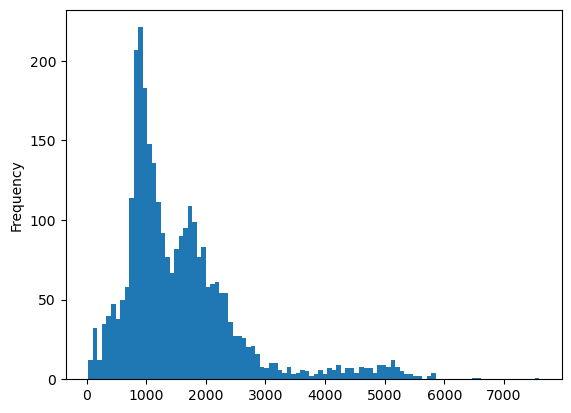

In [7]:
# Add a column to the dataframe that contains the length of the tweet
train_df['length'] = train_df['text'].str.len()

# Plot the length of the tweets
train_df['length'].plot(bins=100, kind='hist')

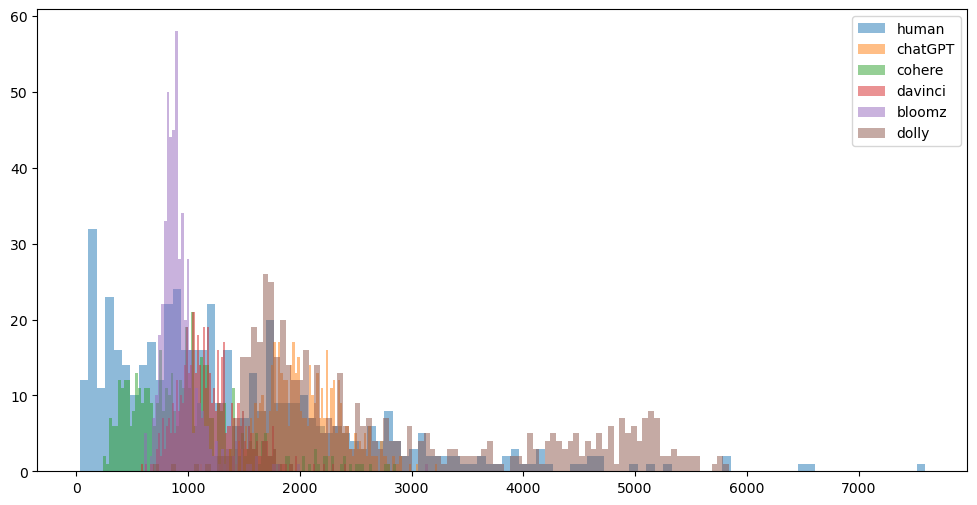

In [8]:
# Plot the length of the tweets based on their label
ax , fig = plt.subplots(figsize=(12, 6))
ax = plt.hist(train_df[train_df['label'] == 0]['length'], bins=100, alpha=0.5, label='human')
ax = plt.hist(train_df[train_df['label'] == 1]['length'], bins=100, alpha=0.5, label='chatGPT')
ax = plt.hist(train_df[train_df['label'] == 2]['length'], bins=100, alpha=0.5, label='cohere')
ax = plt.hist(train_df[train_df['label'] == 3]['length'], bins=100, alpha=0.5, label='davinci')
ax = plt.hist(train_df[train_df['label'] == 4]['length'], bins=100, alpha=0.5, label='bloomz')
ax = plt.hist(train_df[train_df['label'] == 5]['length'], bins=100, alpha=0.5, label='dolly')
plt.legend(loc='upper right')
plt.show()

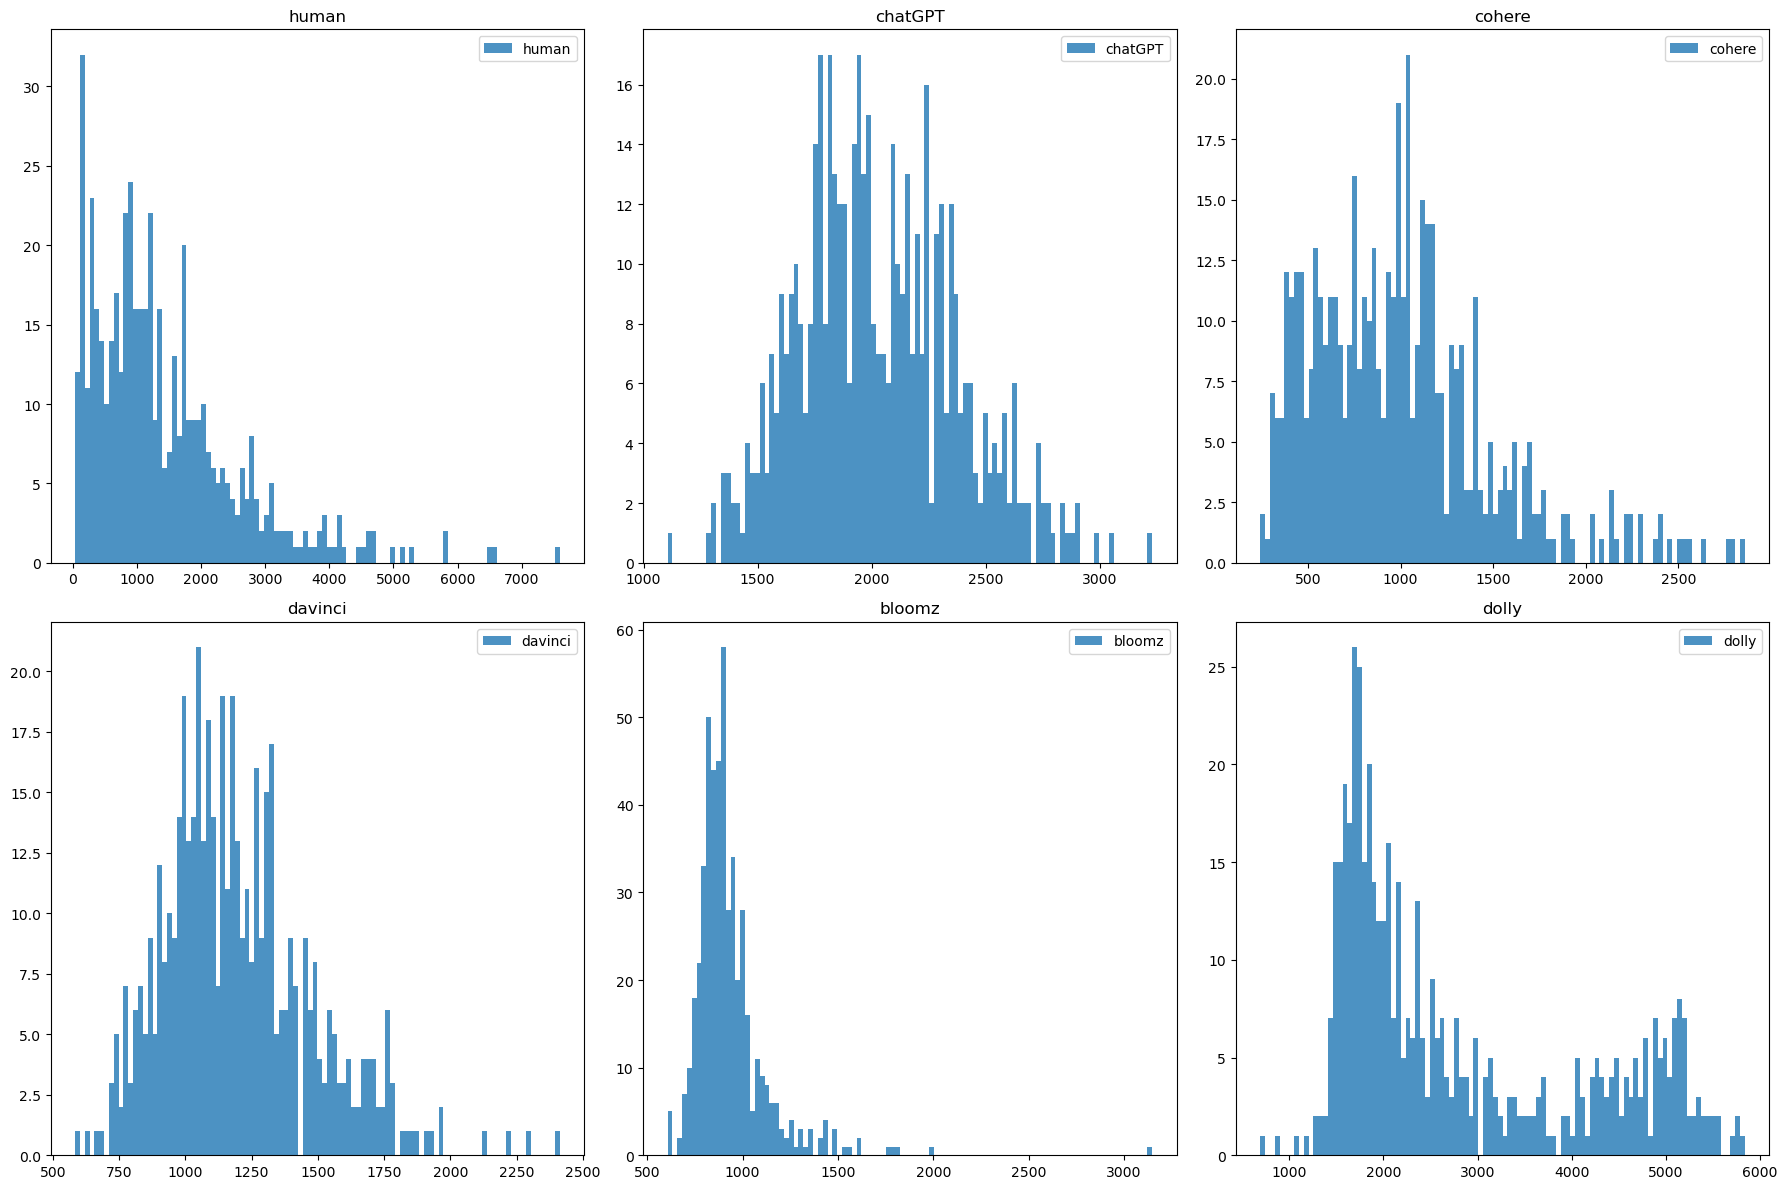

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

labels = ['human', 'chatGPT', 'cohere', 'davinci', 'bloomz', 'dolly']

for i, ax in enumerate(axes.flatten()):
    ax.hist(train_df[train_df['label'] == i]['length'], bins=100, alpha=0.8, label=labels[i])
    ax.set_title(labels[i])
    ax.legend(loc='upper right')
    xticks = ax.xaxis.get_major_ticks()

plt.tight_layout()
plt.show()

In [10]:
from transformers import RobertaTokenizer, RobertaModel

# Load pre-trained BERT model and tokenizer
model_name = 'roberta-large'
tokenizer = RobertaTokenizer.from_pretrained(model_name)
# bert_model = RobertaModel.from_pretrained(model_name)

c:\Users\Amirreza\.conda\envs\deeplearning\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Token indices sequence length is longer than the specified maximum sequence length for this model (590 > 512). Running this sequence through the model will result in indexing errors


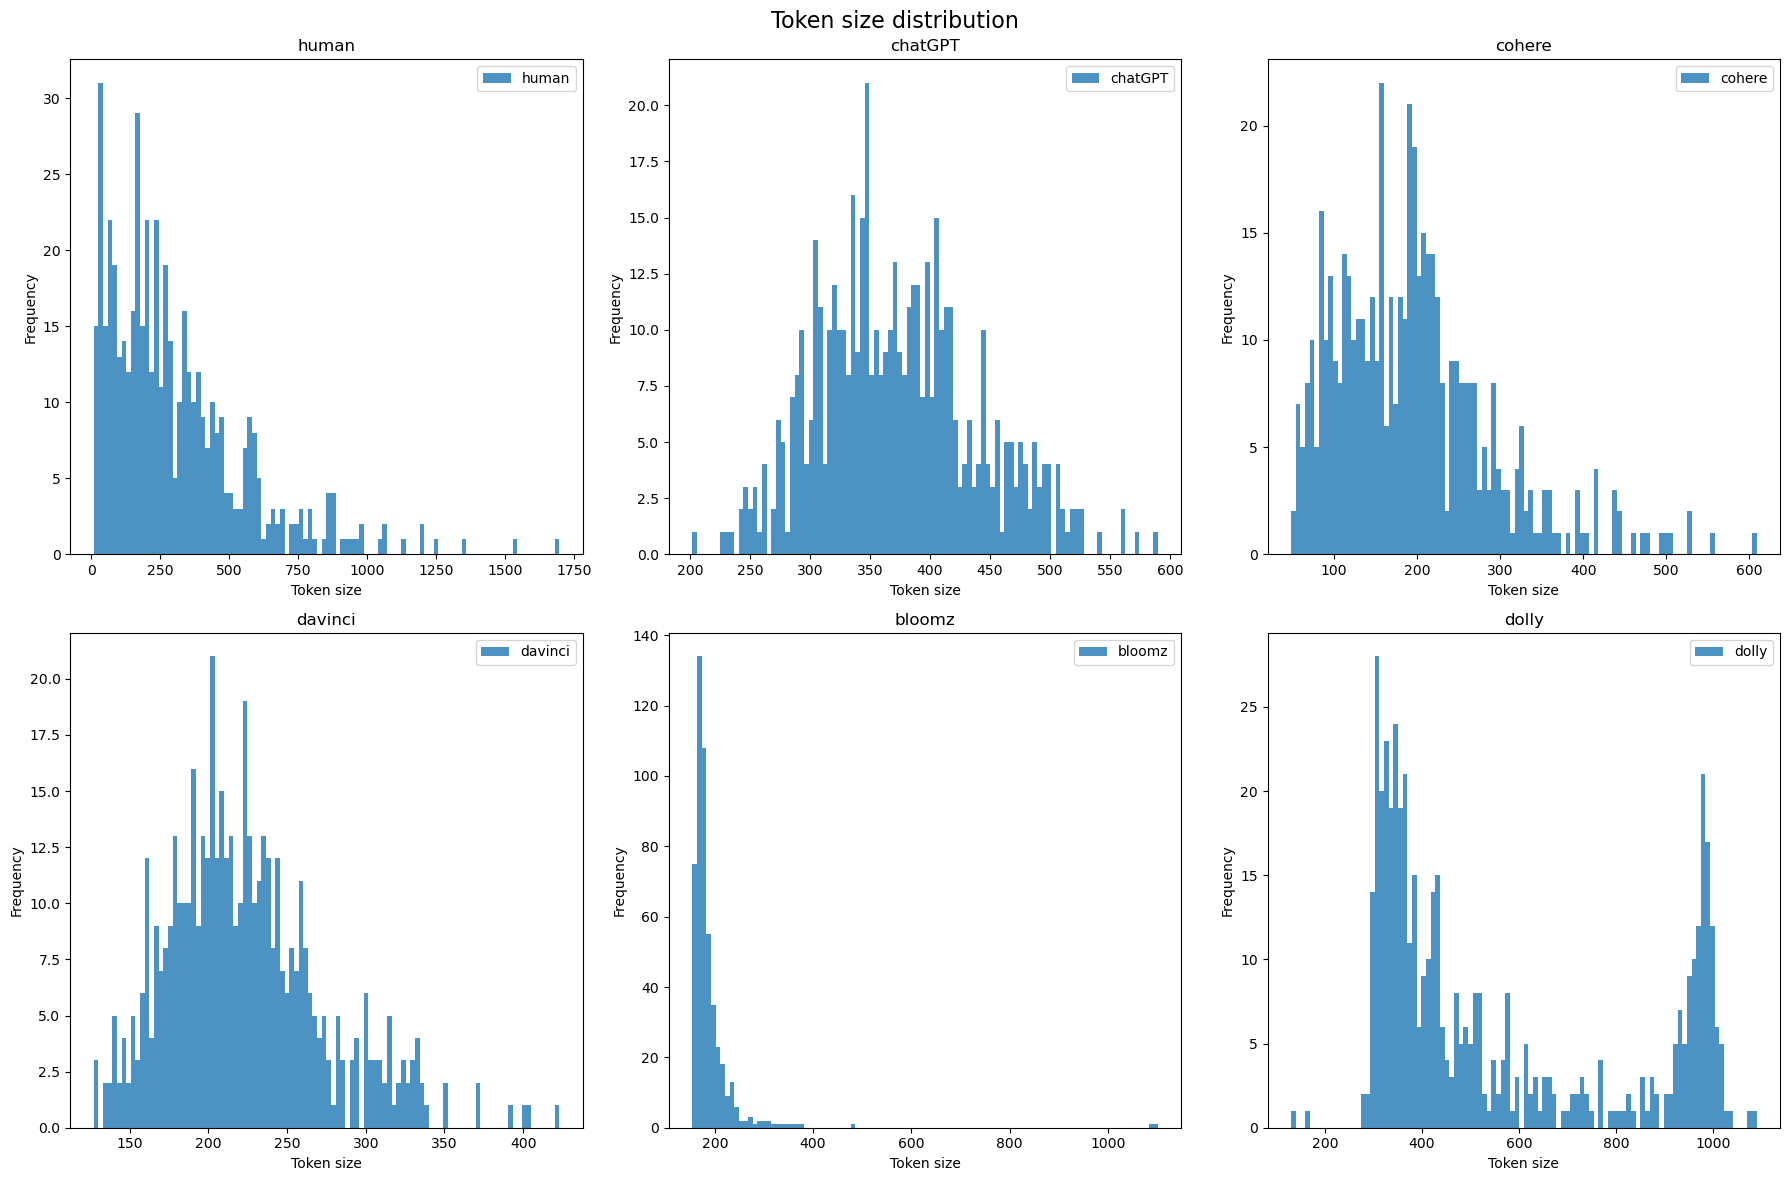

In [11]:
# Tokenize the dataset
tokenized_data = train_df['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

# Add a column to the dataframe that contains the token size
train_df['token_size'] = tokenized_data.apply(lambda x: len(x))

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

labels = ['human', 'chatGPT', 'cohere', 'davinci', 'bloomz', 'dolly']

for i, ax in enumerate(axes.flatten()):
    ax.hist(train_df[train_df['label'] == i]['token_size'], bins=100, alpha=0.8, label=labels[i])
    ax.set_title(labels[i])
    ax.legend(loc='upper right')
    ax.set_xlabel('Token size')
    ax.set_ylabel('Frequency')
    xticks = ax.xaxis.get_major_ticks()

fig.suptitle('Token size distribution', fontsize=16)
fig.tight_layout()
plt.show()


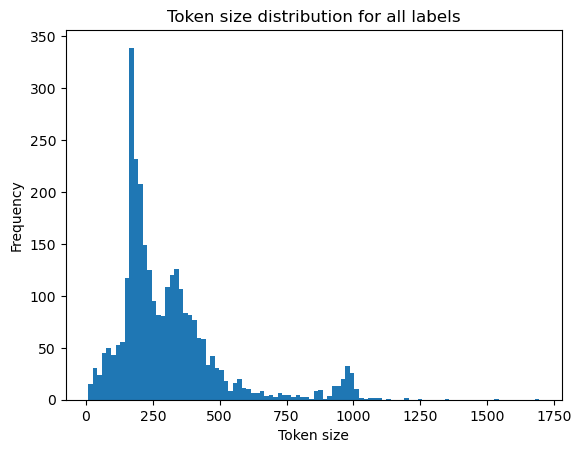

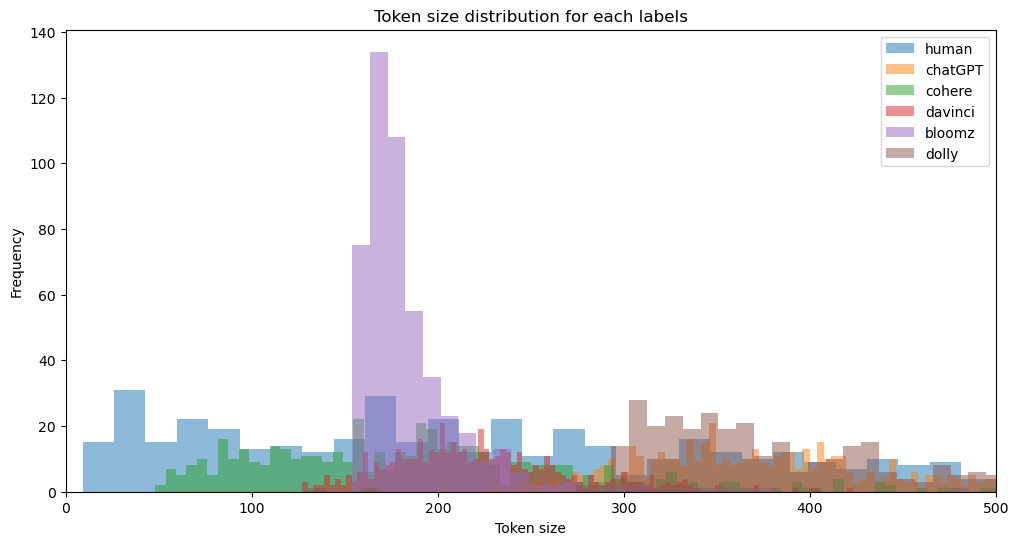

In [12]:
# Plot the length of the tokens
train_df['token_size'].plot(bins=100, kind='hist')
# Xlabel
plt.xlabel('Token size')
# Ylabel
plt.ylabel('Frequency')
plt.title('Token size distribution for all labels')

# Plot the length of the tokens based on their label
ax , fig = plt.subplots(figsize=(12, 6))
ax = plt.hist(train_df[train_df['label'] == 0]['token_size'], bins=100, alpha=0.5, label='human')
ax = plt.hist(train_df[train_df['label'] == 1]['token_size'], bins=100, alpha=0.5, label='chatGPT')
ax = plt.hist(train_df[train_df['label'] == 2]['token_size'], bins=100, alpha=0.5, label='cohere')
ax = plt.hist(train_df[train_df['label'] == 3]['token_size'], bins=100, alpha=0.5, label='davinci')
ax = plt.hist(train_df[train_df['label'] == 4]['token_size'], bins=100, alpha=0.5, label='bloomz')
ax = plt.hist(train_df[train_df['label'] == 5]['token_size'], bins=100, alpha=0.5, label='dolly')
plt.legend(loc='upper right')
plt.xlabel('Token size')
plt.ylabel('Frequency')
plt.title('Token size distribution for each labels')
# xlim 
plt.xlim(0, 500)
plt.show()

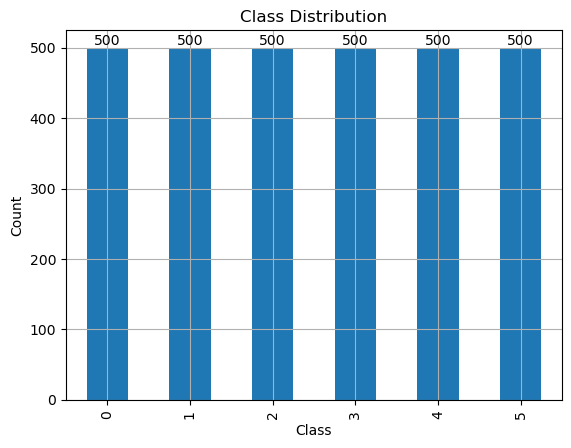

In [13]:
# Count the number of samples for each class
class_counts = train_df['label'].value_counts()

# Sort the class counts by label
class_counts = class_counts.sort_index()

# Visualize the class distribution
ax = class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.grid()

# Add value labels to the bars
for i, v in enumerate(class_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


# Data cleaning

In [14]:
train_df['text'].unique().shape
train_df.isnull().sum()

text          0
model         0
source        0
label         0
id            0
length        0
token_size    0
dtype: int64

### Expand Contractions

In [15]:
# For regular expressions
import re

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
train_df['text']=train_df['text'].apply(lambda x:expand_contractions(x))

### Lowercase the text

In [16]:
train_df['cleaned']=train_df['text'].apply(lambda x: x.lower())

### Remove digits and words containing digits

In [17]:
train_df['cleaned']=train_df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

### Remove Punctuations

In [18]:
import string
train_df['cleaned']=train_df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# Removing extra spaces
train_df['cleaned']=train_df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [19]:
for index,text in enumerate(train_df['text'][38:40]):
    print('text %d:\n'%(index+1),text)

text 1:
 This study presents Edward, a probabilistic programming language that defines two compositional representations: random variables and inference. The authors argue that by treating inference as equal to modeling, probabilistic programming can be as flexible and computationally efficient as traditional deep learning. The paper suggests that Edward offers both flexibility and efficiency in fitting the same model using a variety of composable inference methods, ranging from point estimation to variational inference to MCMC. Additionally, Edward can reuse the modeling representation as part of inference, making it straightforward to design rich variational models and generative adversarial networks. The authors demonstrate that Edward is integrated into TensorFlow, providing significant speedups over existing probabilistic systems. 

Overall, the paper presents a sophisticated and conceptually interesting probabilistic programming language that appears to be computationally efficie

In [20]:
for index,text in enumerate(train_df['cleaned'][38:40]):
    print('text %d:\n'%(index+1),text)

text 1:
 this study presents edward a probabilistic programming language that defines two compositional representations random variables and inference the authors argue that by treating inference as equal to modeling probabilistic programming can be as flexible and computationally efficient as traditional deep learning the paper suggests that edward offers both flexibility and efficiency in fitting the same model using a variety of composable inference methods ranging from point estimation to variational inference to mcmc additionally edward can reuse the modeling representation as part of inference making it straightforward to design rich variational models and generative adversarial networks the authors demonstrate that edward is integrated into tensorflow providing significant speedups over existing probabilistic systems 

overall the paper presents a sophisticated and conceptually interesting probabilistic programming language that appears to be computationally efficient and flexib

In [35]:
# Grouping text by label
df_grouped=train_df[['cleaned','label']].groupby('label').agg(lambda x:' '.join(x))
df_grouped.head()

,cleaned
label,
0,the paper extends the ntm by a trainable memor...
1,overall i found the paper machine comprehensio...
2,\ni have read and provided comments on the pap...
3,\n\nthis paper presents a novel approach to ma...
4,the authors propose to prune convolutional neu...


In [37]:
import random
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Creating Document Term Matrix
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['cleaned'])
df_dtm = panda.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index
df_dtm.head()

,aa,aaai,aamas,aan,aardvark,abandon,abandoning,abbeel,abbreviation,abbreviations,...,组建人工智慧的对話学习算法,而未标注的数据怎么办,起来比较好的做贡献,超参数强化等等,这个方法称之为,这个特殊,这些组合后,这样一个模型在不同的情景下部分组件不一样的参数下都能达到同样的效能,这样做的主要依据就是将参数异化到各种样本和输入的那个特征上,这种强化可以让参数自然稳定性得很好
label,,,,,,,,,,,,,,,,,,,,,
0,3,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


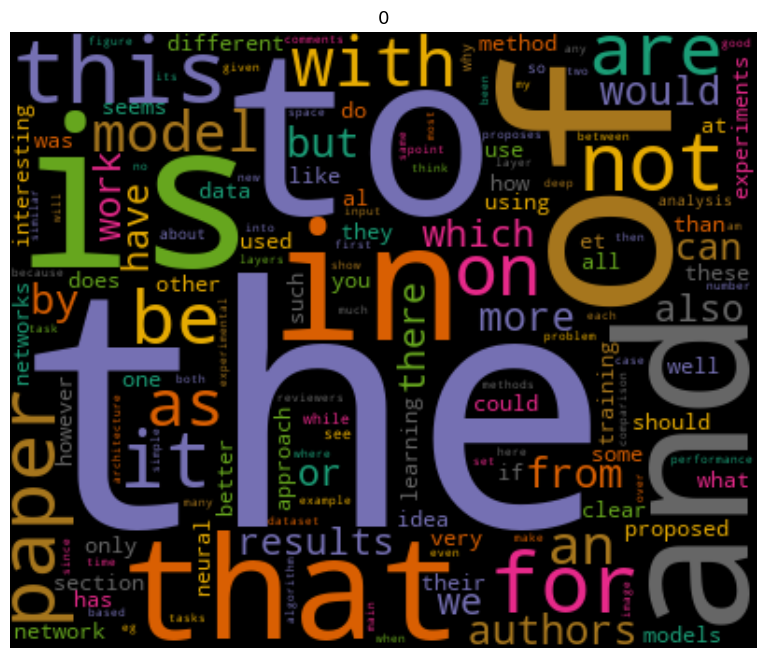

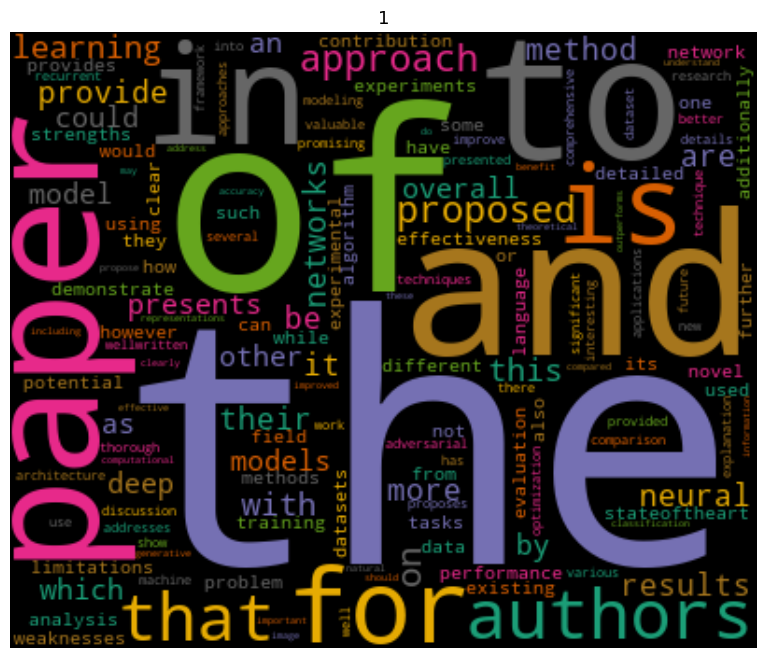

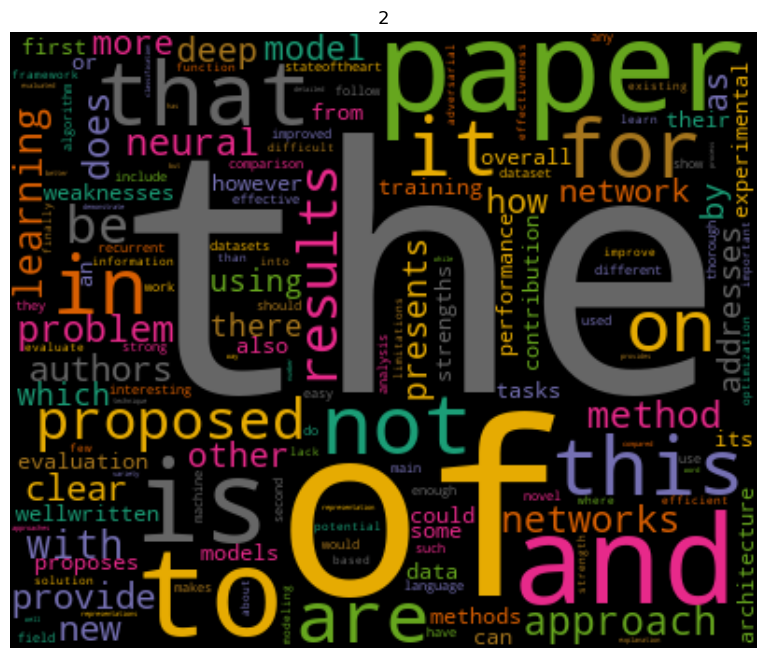

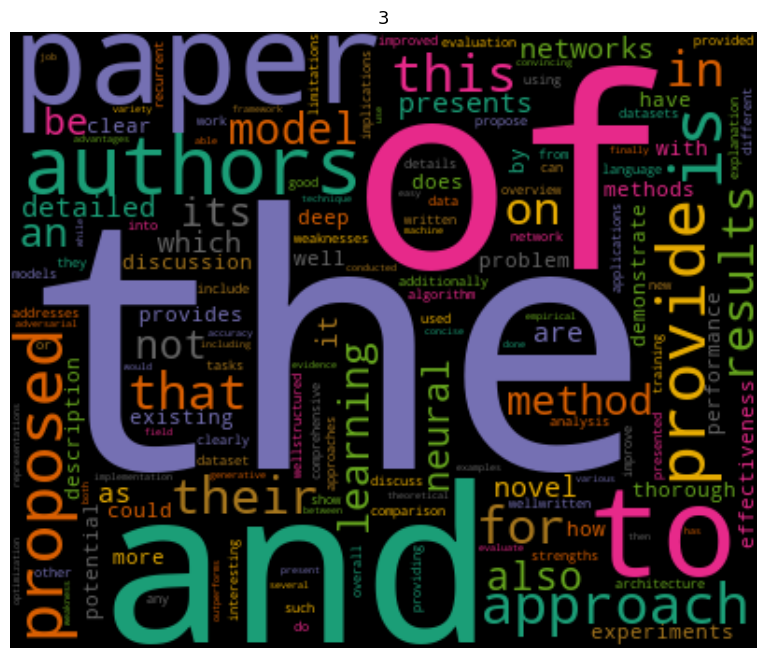

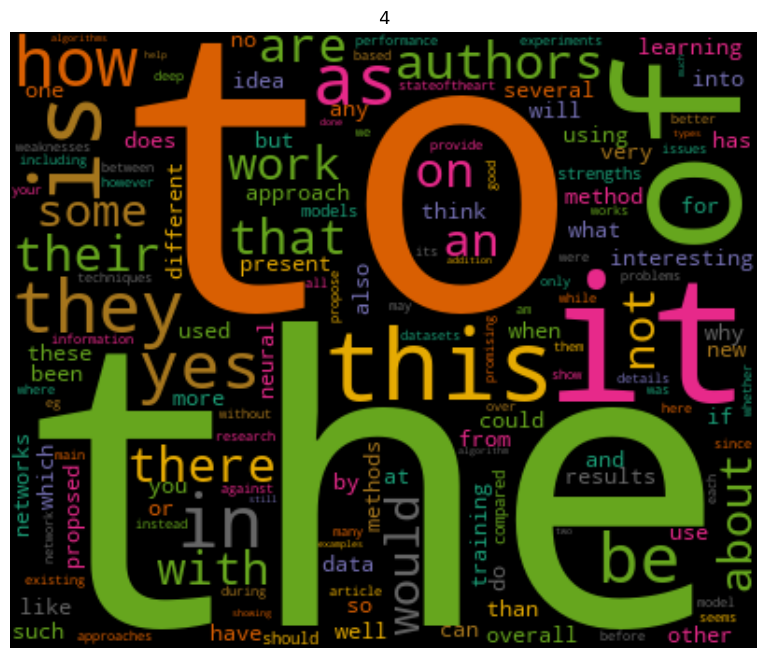

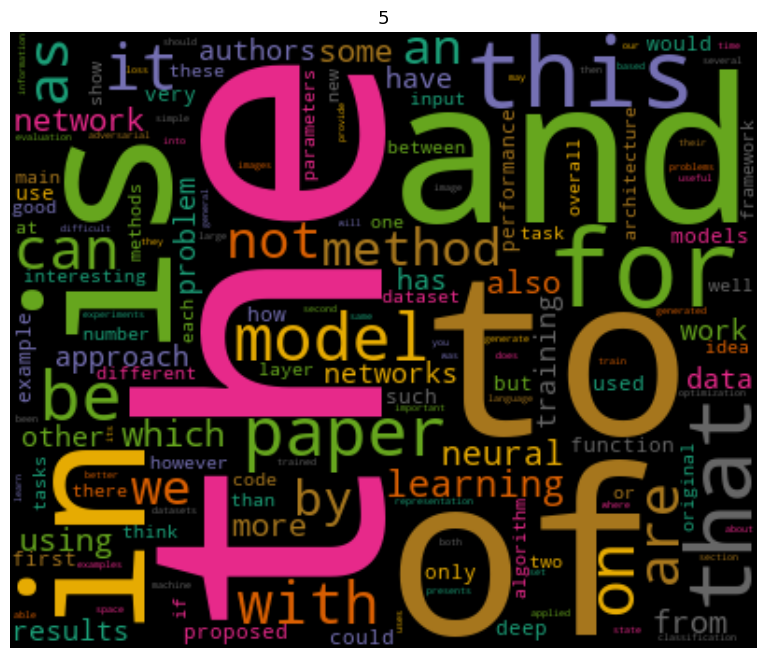

In [42]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each label
for index,lebel in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[lebel].sort_values(ascending=False),str(lebel))


In [46]:
# Fit the CountVectorizer on the 'cleaned' column
cv.fit(train_df['cleaned'])

# Get the most frequent words
most_frequent_words = cv.get_feature_names_out()

# Convert the most frequent words to an array
most_frequent_words_array = np.array(most_frequent_words)

# Print the array of most frequent words
print(most_frequent_words_array)


['aa' 'aaai' 'aamas' ... '这样一个模型在不同的情景下部分组件不一样的参数下都能达到同样的效能'
 '这样做的主要依据就是将参数异化到各种样本和输入的那个特征上' '这种强化可以让参数自然稳定性得很好']


In [52]:
def corpus(text):
    text_list = text.split()
    return text_list

train_df['text_lists'] = train_df['cleaned'].apply(corpus)
train_df.head(10)

,text,model,source,label,id,length,token_size,cleaned,text_lists
0,"Overall, I found the paper ""Machine Comprehens...",chatGPT,peerread,1,1844,2186,392,overall i found the paper machine comprehensio...,"[overall, i, found, the, paper, machine, compr..."
1,"This paper ""Machine Comprehension Using Match-...",chatGPT,peerread,1,1845,1825,345,this paper machine comprehension using matchls...,"[this, paper, machine, comprehension, using, m..."
2,The paper presents an end-to-end neural archit...,chatGPT,peerread,1,1846,1581,301,the paper presents an endtoend neural architec...,"[the, paper, presents, an, endtoend, neural, a..."
3,This paper proposes an end-to-end neural archi...,chatGPT,peerread,1,1847,1830,336,this paper proposes an endtoend neural archite...,"[this, paper, proposes, an, endtoend, neural, ..."
4,Title: Incorporating long-range consistency in...,chatGPT,peerread,1,1848,2528,449,title incorporating longrange consistency in c...,"[title, incorporating, longrange, consistency,..."
5,The paper 'Incorporating long-range consistenc...,chatGPT,peerread,1,1849,2223,382,the paper incorporating longrange consistency ...,"[the, paper, incorporating, longrange, consist..."
6,"The paper ""Incorporating long-range consistenc...",chatGPT,peerread,1,1850,1513,263,the paper incorporating longrange consistency ...,"[the, paper, incorporating, longrange, consist..."
7,"The paper titled ""Incorporating Long-Range Con...",chatGPT,peerread,1,1851,1968,358,the paper titled incorporating longrange consi...,"[the, paper, titled, incorporating, longrange,..."
8,Title: Dynamic Coattention Networks For Questi...,chatGPT,peerread,1,1852,2011,389,title dynamic coattention networks for questio...,"[title, dynamic, coattention, networks, for, q..."
9,"The paper ""Dynamic Coattention Networks For Qu...",chatGPT,peerread,1,1853,2423,465,the paper dynamic coattention networks for que...,"[the, paper, dynamic, coattention, networks, f..."


In [58]:
from tqdm import trange
from collections import Counter

corpus = []
for i in trange(train_df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += train_df['text_lists'][i]
len(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:00<00:00, 81079.12it/s]


705608

In [59]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('the', 58794),
 ('of', 25063),
 ('to', 19475),
 ('and', 17888),
 ('a', 17639),
 ('is', 14140),
 ('paper', 10838),
 ('in', 10209),
 ('for', 8291),
 ('that', 8146)]

In [60]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

C:\Users\Amirreza\AppData\Local\Temp\ipykernel_27808\3100832279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq, y=words ,palette='rocket')


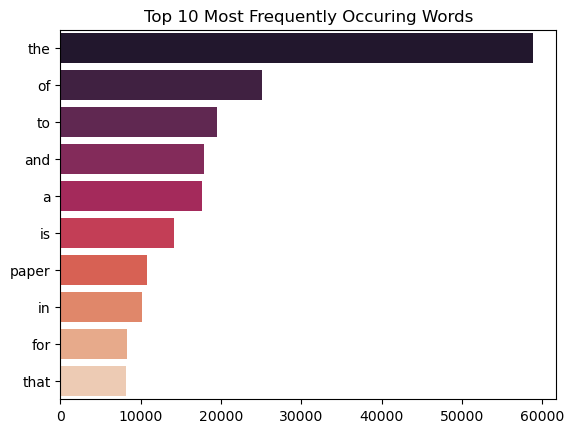

In [69]:
import seaborn as sns

sns.barplot(x=freq, y=words ,palette='rocket')
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

### Most Frequently occuring N_grams

C:\Users\Amirreza\AppData\Local\Temp\ipykernel_27808\1114951686.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10], palette='rocket')


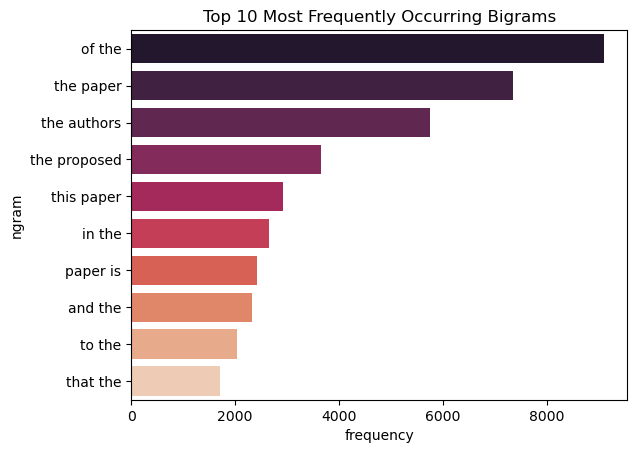

In [70]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(train_df['cleaned'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = panda.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10], palette='rocket')
plt.title('Top 10 Most Frequently Occurring Bigrams')
plt.show()

C:\Users\Amirreza\AppData\Local\Temp\ipykernel_27808\3751894754.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10], palette='rocket')


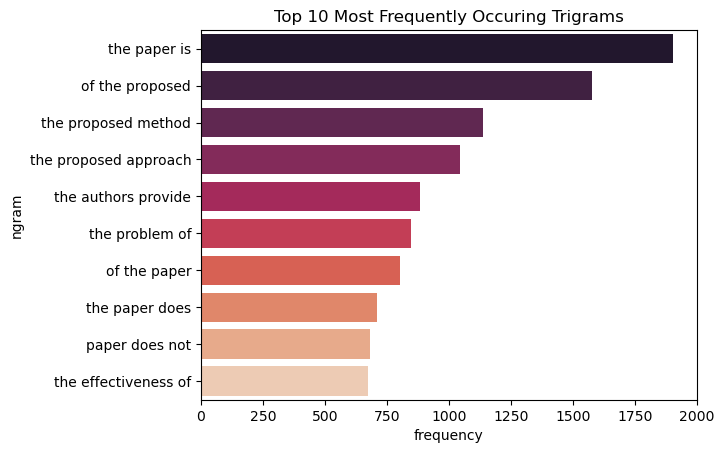

In [73]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(train_df['cleaned'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = panda.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10], palette='rocket')
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()